<a href="https://colab.research.google.com/github/anshumaannn/Work/blob/main/Instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the datasets
test_data = pd.read_csv('/content/test (1).csv')
train_data = pd.read_csv('/content/train (1).csv')

# Data Exploration

In [ ]:
# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

Training Data:
   profile pic  nums/length username  fullname words  nums/length fullname  \
0            1                  0.27               0                   0.0   
1            1                  0.00               2                   0.0   
2            1                  0.10               2                   0.0   
3            1                  0.00               1                   0.0   
4            1                  0.00               2                   0.0   

   name==username  description length  external URL  private  #posts  \
0               0                  53             0        0      32   
1               0                  44             0        0     286   
2               0                   0             0        1      13   
3               0                  82             0        0     679   
4               0                   0             0        1       6   

   #followers  #follows  fake  
0        1000       955     0  
1        2740      

In [ ]:
# Check data types and missing values
print("Training Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (t

In [ ]:
# Check the shape and data types
print("Train Dataset Shape:", train_data.shape)
print("Test Dataset Shape:", test_data.shape)

print("Train Data Types:\n", train_data.dtypes)
print("Missing Values in Train Dataset:\n", train_data.isnull().sum())

Train Dataset Shape: (576, 12)
Test Dataset Shape: (120, 12)
Train Data Types:
 profile pic               int64
nums/length username    float64
fullname words            int64
nums/length fullname    float64
name==username            int64
description length        int64
external URL              int64
private                   int64
#posts                    int64
#followers                int64
#follows                  int64
fake                      int64
dtype: object
Missing Values in Train Dataset:
 profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [ ]:
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())
print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Missing Values in Training Data:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

Missing Values in Test Data:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [ ]:
# Calculate percentage of missing values
train_missing_percentage = train_data.isnull().mean() * 100
test_missing_percentage = test_data.isnull().mean() * 100

print("\nPercentage of Missing Values in Training Data:")
print(train_missing_percentage[train_missing_percentage > 0])

print("\nPercentage of Missing Values in Test Data:")
print(test_missing_percentage[test_missing_percentage > 0])


Percentage of Missing Values in Training Data:
Series([], dtype: float64)

Percentage of Missing Values in Test Data:
Series([], dtype: float64)


In [ ]:
# Impute missing values in numerical columns with the mean
numerical_cols = train_data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    train_data[col].fillna(train_data[col].mean(), inplace=True)
    test_data[col].fillna(test_data[col].mean(), inplace=True)

# Impute missing values in categorical columns with the mode
categorical_cols = train_data.select_dtypes(include=['object']).columns

for col in categorical_cols:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

In [ ]:
# Drop columns with more than 30% missing values
threshold = 0.3
train_data.dropna(thresh=len(train_data) * (1 - threshold), axis=1, inplace=True)
test_data.dropna(thresh=len(test_data) * (1 - threshold), axis=1, inplace=True)

# Drop rows with any missing values (if necessary)
# train_data.dropna(inplace=True)
# test_data.dropna(inplace=True)

In [ ]:
# Check for missing values again
print("Missing Values in Training Data After Imputation:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data After Imputation:")
print(test_data.isnull().sum())

Missing Values in Training Data After Imputation:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

Missing Values in Test Data After Imputation:
profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64


In [ ]:
# Summary statistics
print("\nSummary Statistics for Training Data:")
print(train_data.describe())

print("\nSummary Statistics for Test Data:")
print(test_data.describe())


Summary Statistics for Training Data:
       profile pic  nums/length username  fullname words  \
count   576.000000            576.000000      576.000000   
mean      0.701389              0.163837        1.460069   
std       0.458047              0.214096        1.052601   
min       0.000000              0.000000        0.000000   
25%       0.000000              0.000000        1.000000   
50%       1.000000              0.000000        1.000000   
75%       1.000000              0.310000        2.000000   
max       1.000000              0.920000       12.000000   

       nums/length fullname  name==username  description length  external URL  \
count            576.000000      576.000000          576.000000    576.000000   
mean               0.036094        0.034722           22.623264      0.116319   
std                0.125121        0.183234           37.702987      0.320886   
min                0.000000        0.000000            0.000000      0.000000   
25%            

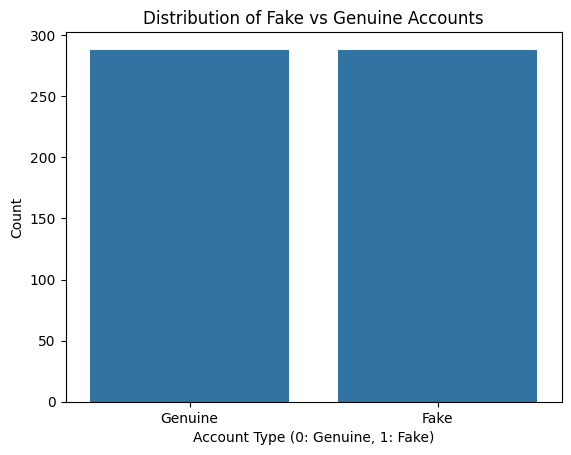

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of fake vs genuine accounts
sns.countplot(x='fake', data=train_data)
plt.title("Distribution of Fake vs Genuine Accounts")
plt.xlabel("Account Type (0: Genuine, 1: Fake)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Genuine', 'Fake'])
plt.show()

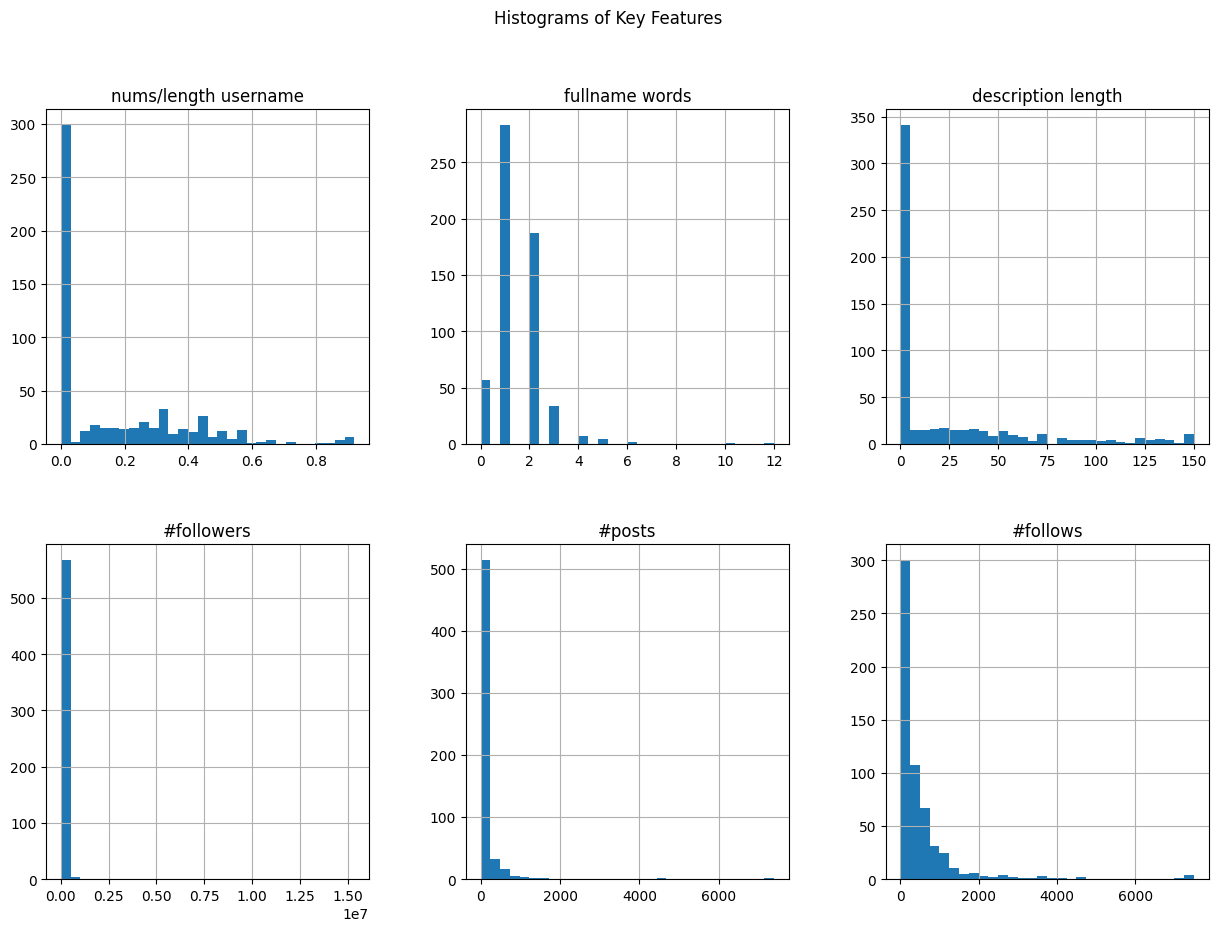

In [ ]:
# Histograms for key features
features = ['nums/length username', 'fullname words', 'description length', '#followers', '#posts', '#follows']

train_data[features].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Histograms of Key Features")
plt.show()

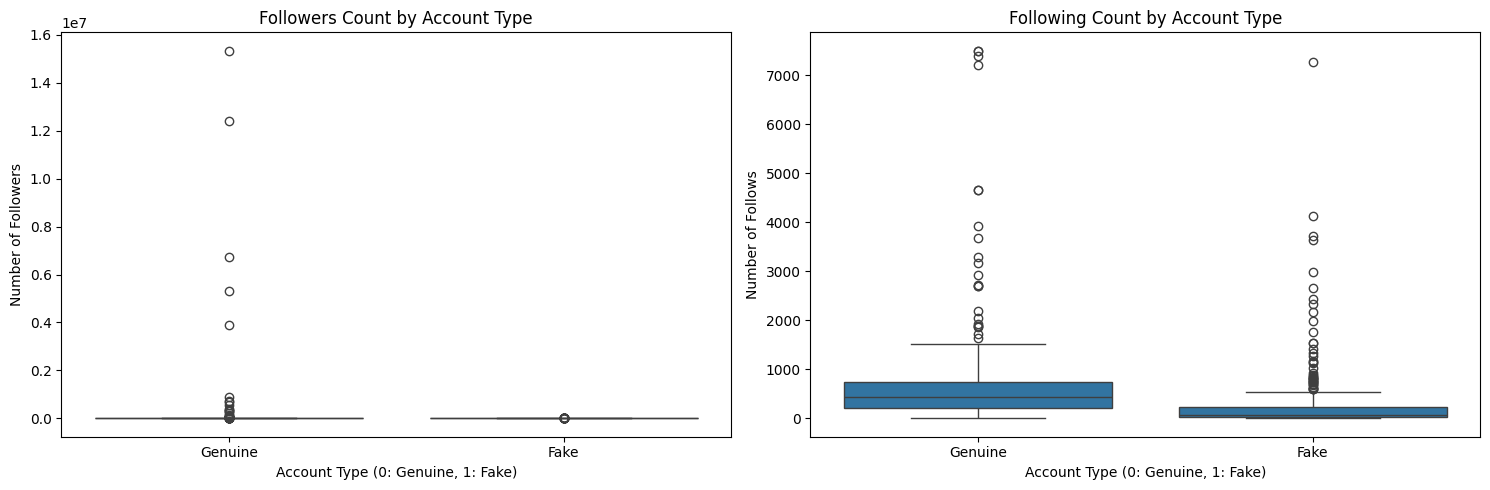

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(x='fake', y='#followers', data=train_data, ax=axes[0])
axes[0].set_title("Followers Count by Account Type")
axes[0].set_xlabel("Account Type (0: Genuine, 1: Fake)")
axes[0].set_ylabel("Number of Followers")
axes[0].set_xticklabels(['Genuine', 'Fake'])

sns.boxplot(x='fake', y='#follows', data=train_data, ax=axes[1])
axes[1].set_title("Following Count by Account Type")
axes[1].set_xlabel("Account Type (0: Genuine, 1: Fake)")
axes[1].set_ylabel("Number of Follows")
axes[1].set_xticklabels(['Genuine', 'Fake'])

plt.tight_layout()
plt.show()

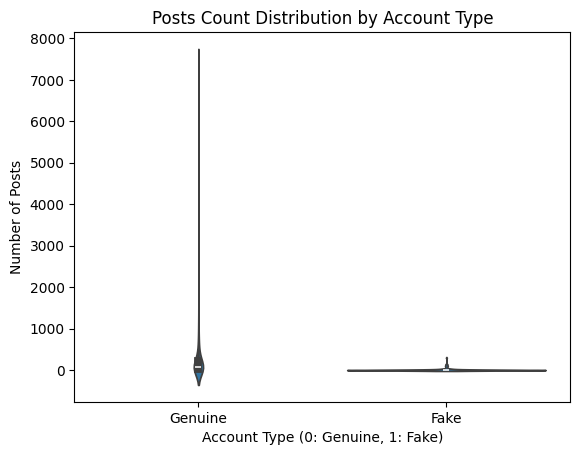

In [ ]:
sns.violinplot(x='fake', y='#posts', data=train_data)
plt.title("Posts Count Distribution by Account Type")
plt.xlabel("Account Type (0: Genuine, 1: Fake)")
plt.ylabel("Number of Posts")
plt.xticks([0, 1], ['Genuine', 'Fake'])
plt.show()

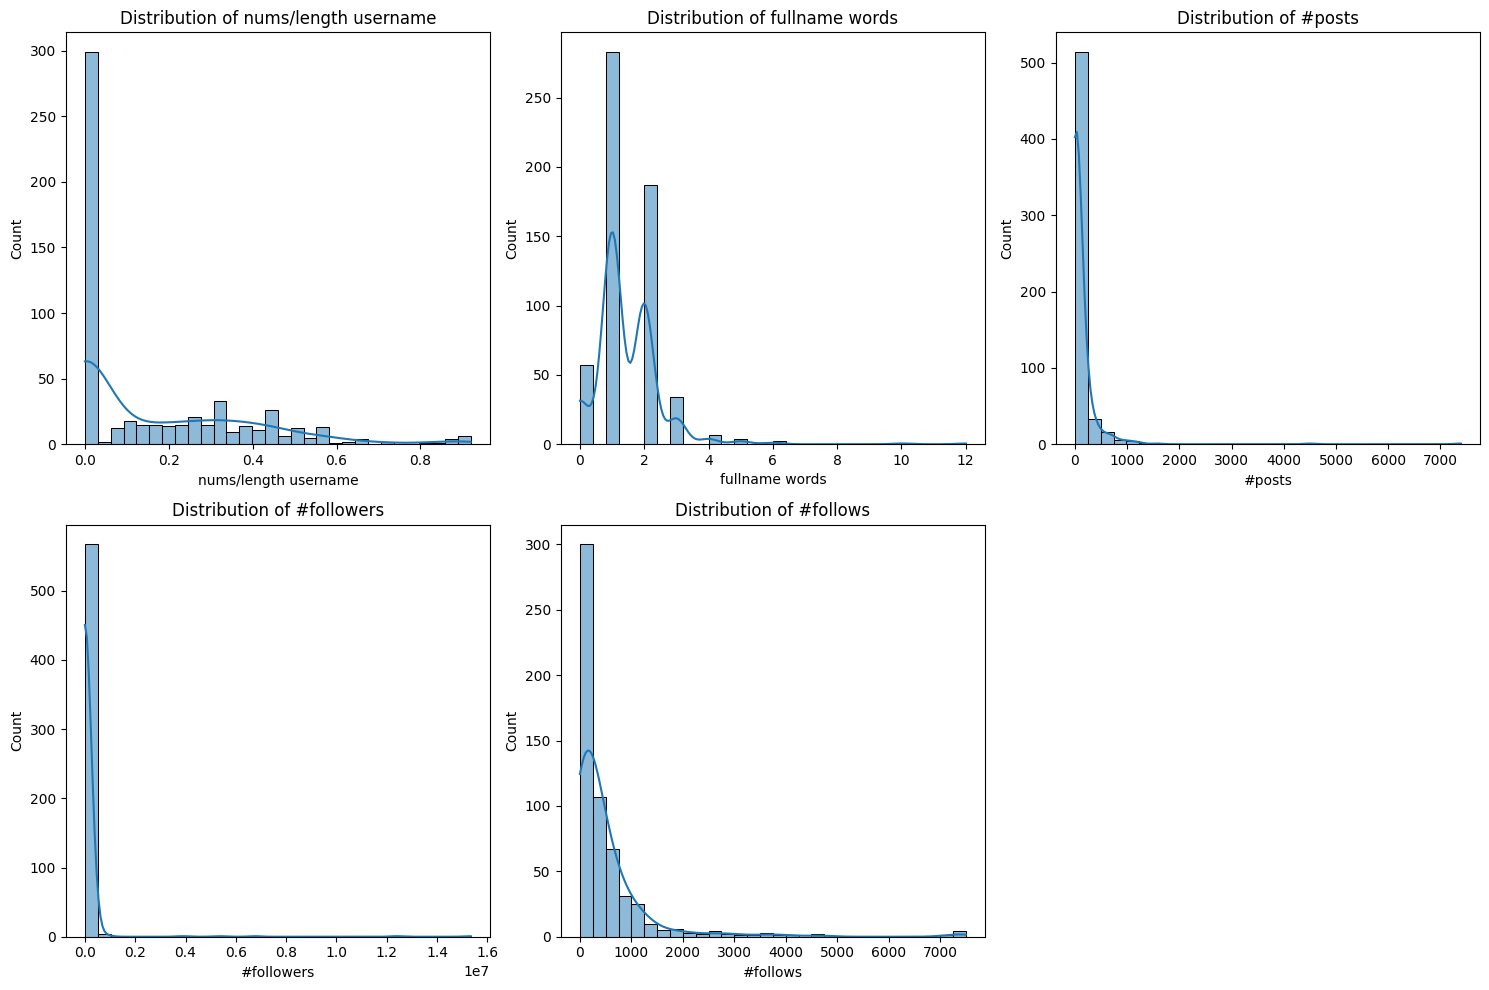

In [ ]:
# Univariate Analysis: Histograms for Numerical Features
num_features = ['nums/length username', 'fullname words', '#posts', '#followers', '#follows']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

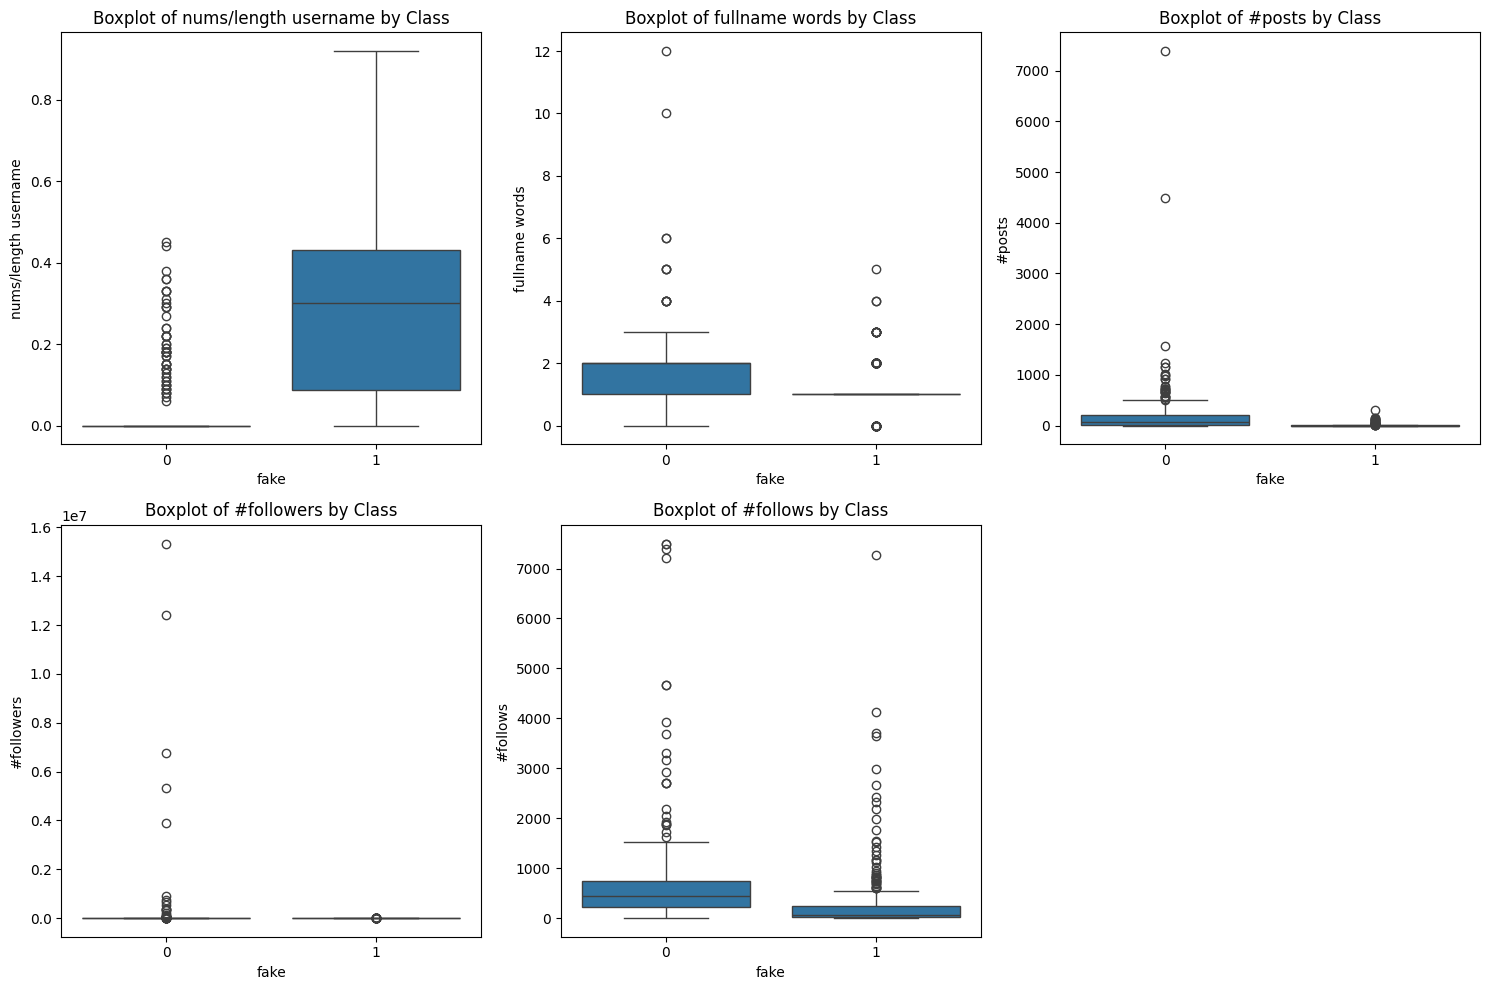

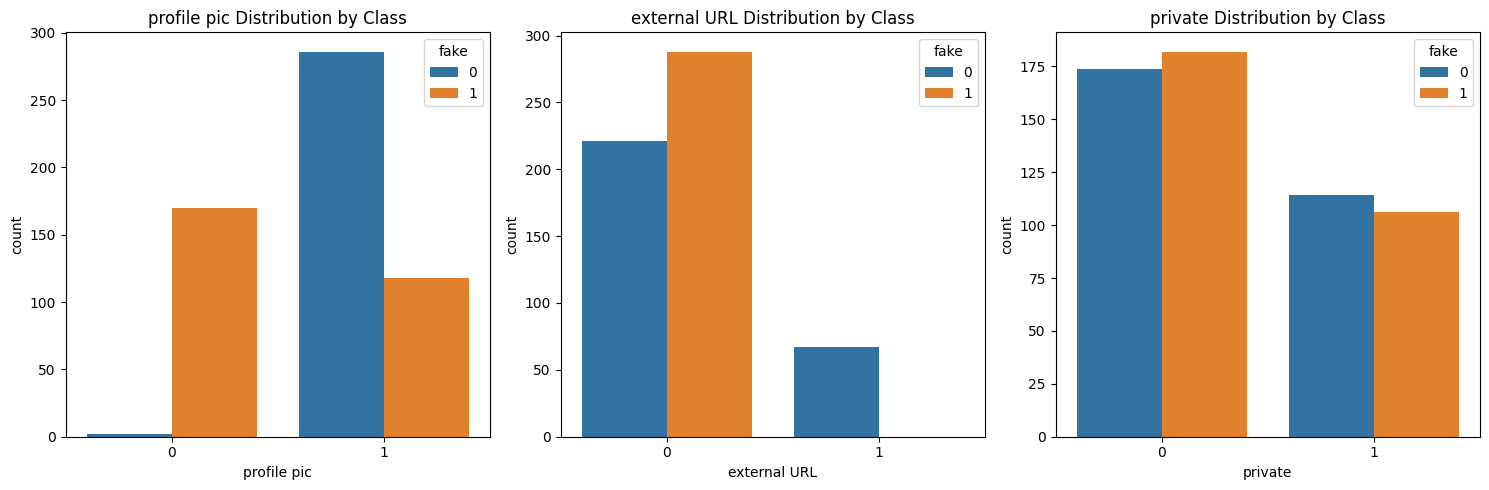

In [ ]:
# Bivariate Analysis: Boxplots for Numerical Features by Class
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='fake', y=col, data=train_data)
    plt.title(f'Boxplot of {col} by Class')
plt.tight_layout()
plt.show()

# Bivariate Analysis: Countplots for Categorical Features
cat_features = ['profile pic', 'external URL', 'private']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=train_data, x=col, hue='fake')
    plt.title(f'{col} Distribution by Class')
plt.tight_layout()
plt.show()

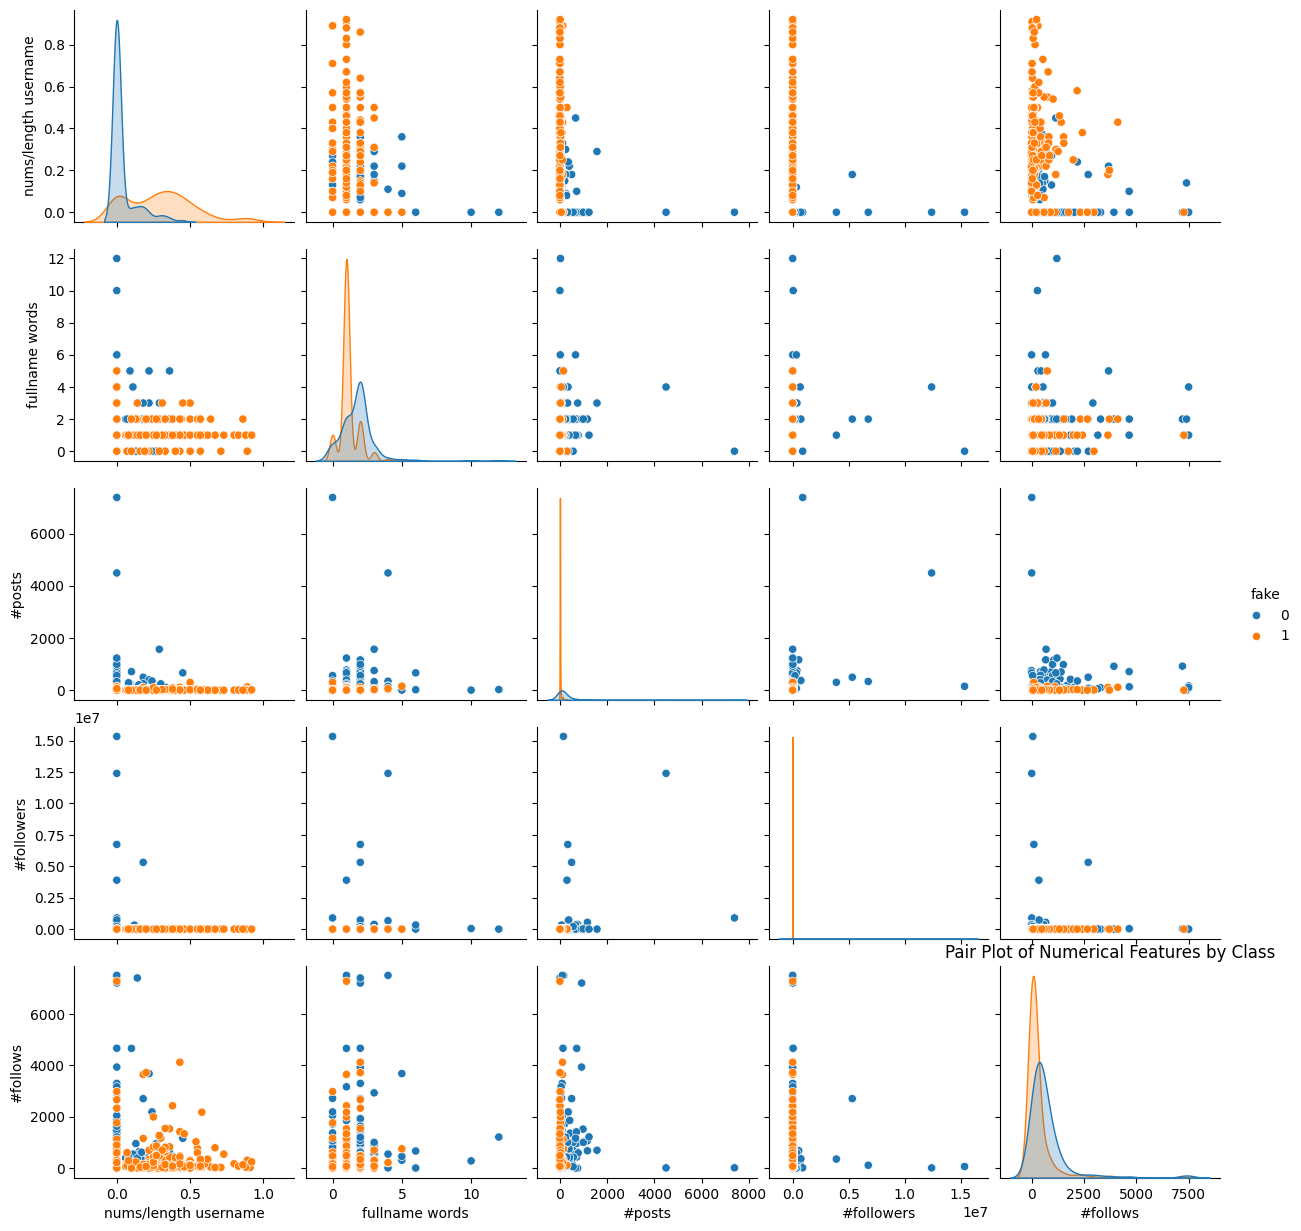

In [ ]:
# Multivariate Analysis: Pair Plots
sns.pairplot(train_data, hue='fake', vars=num_features)
plt.title('Pair Plot of Numerical Features by Class')
plt.show()

# Visualizing Insights

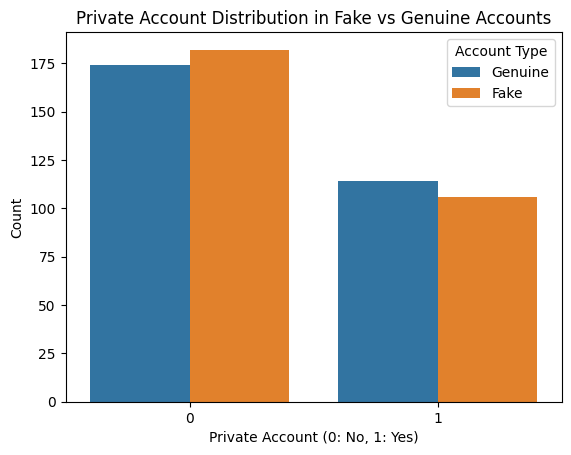

In [ ]:
sns.countplot(x='private', hue='fake', data=train_data)
plt.title("Private Account Distribution in Fake vs Genuine Accounts")
plt.xlabel("Private Account (0: No, 1: Yes)")
plt.ylabel("Count")
plt.legend(title='Account Type', labels=['Genuine', 'Fake'])
plt.show()

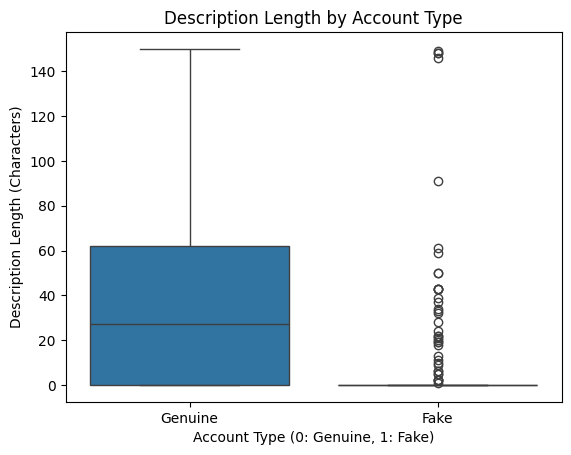

In [ ]:
sns.boxplot(x='fake', y='description length', data=train_data)
plt.title("Description Length by Account Type")
plt.xlabel("Account Type (0: Genuine, 1: Fake)")
plt.ylabel("Description Length (Characters)")
plt.xticks([0, 1], ['Genuine', 'Fake'])
plt.show()

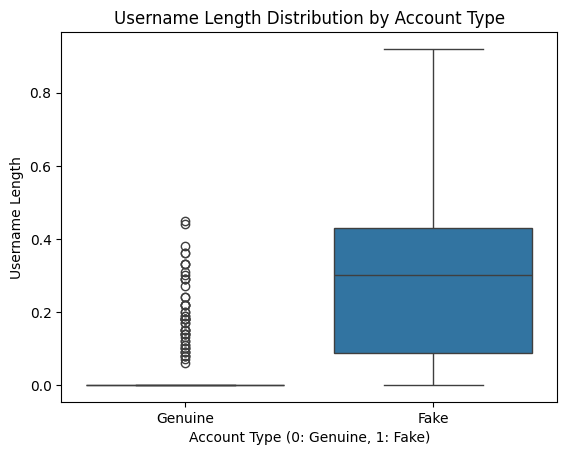

In [ ]:
sns.boxplot(x='fake', y='nums/length username', data=train_data)
plt.title("Username Length Distribution by Account Type")
plt.xlabel("Account Type (0: Genuine, 1: Fake)")
plt.ylabel("Username Length")
plt.xticks([0, 1], ['Genuine', 'Fake'])
plt.show()

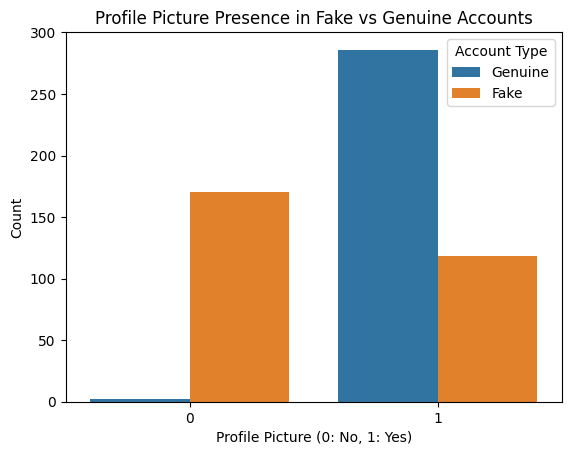

In [ ]:
# Assuming 'profile pic' is the correct column name (based on the CSV file)
sns.countplot(x='profile pic', hue='fake', data=train_data)
plt.title("Profile Picture Presence in Fake vs Genuine Accounts")
plt.xlabel("Profile Picture (0: No, 1: Yes)")
plt.ylabel("Count")
plt.legend(title='Account Type', labels=['Genuine', 'Fake'])
plt.show()

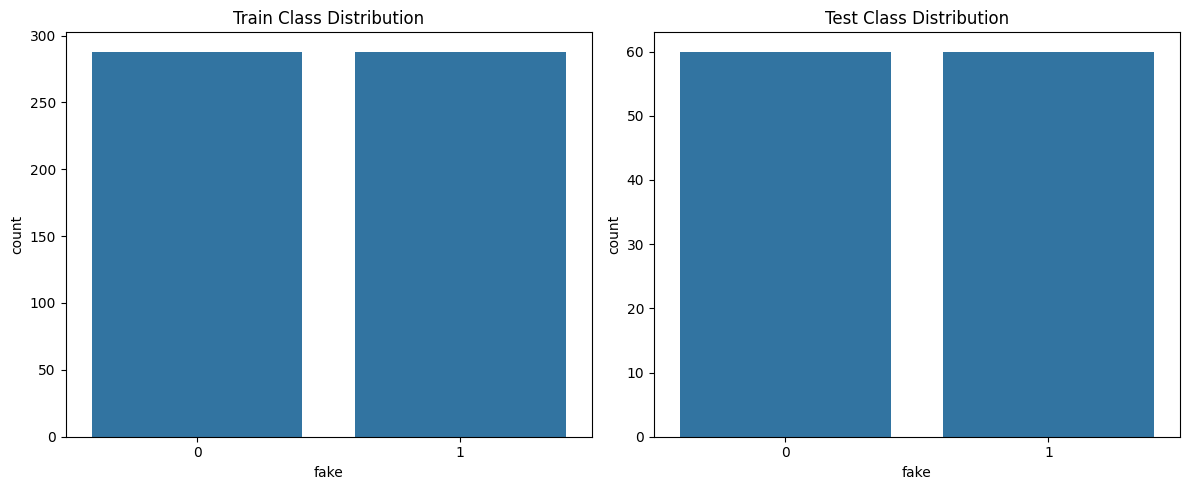

In [ ]:
# Visualize class distribution in both datasets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='fake', data=train_data)
plt.title('Train Class Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='fake', data=test_data)
plt.title('Test Class Distribution')

plt.tight_layout()
plt.show()

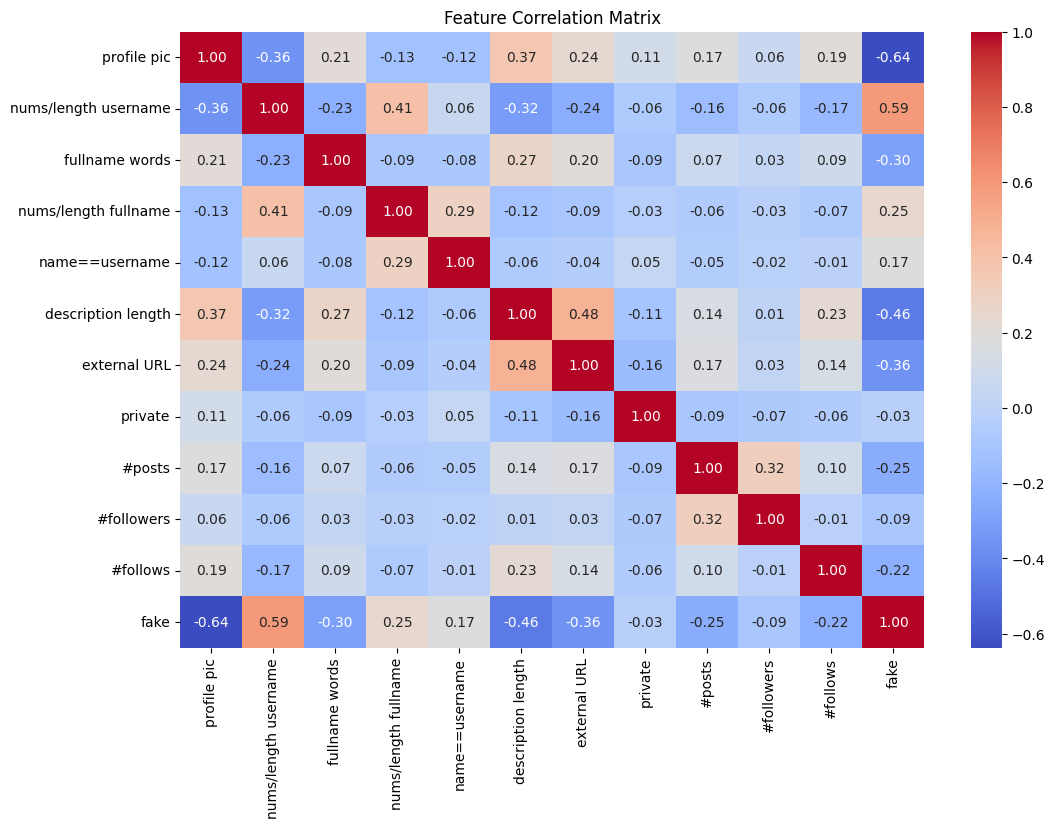

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

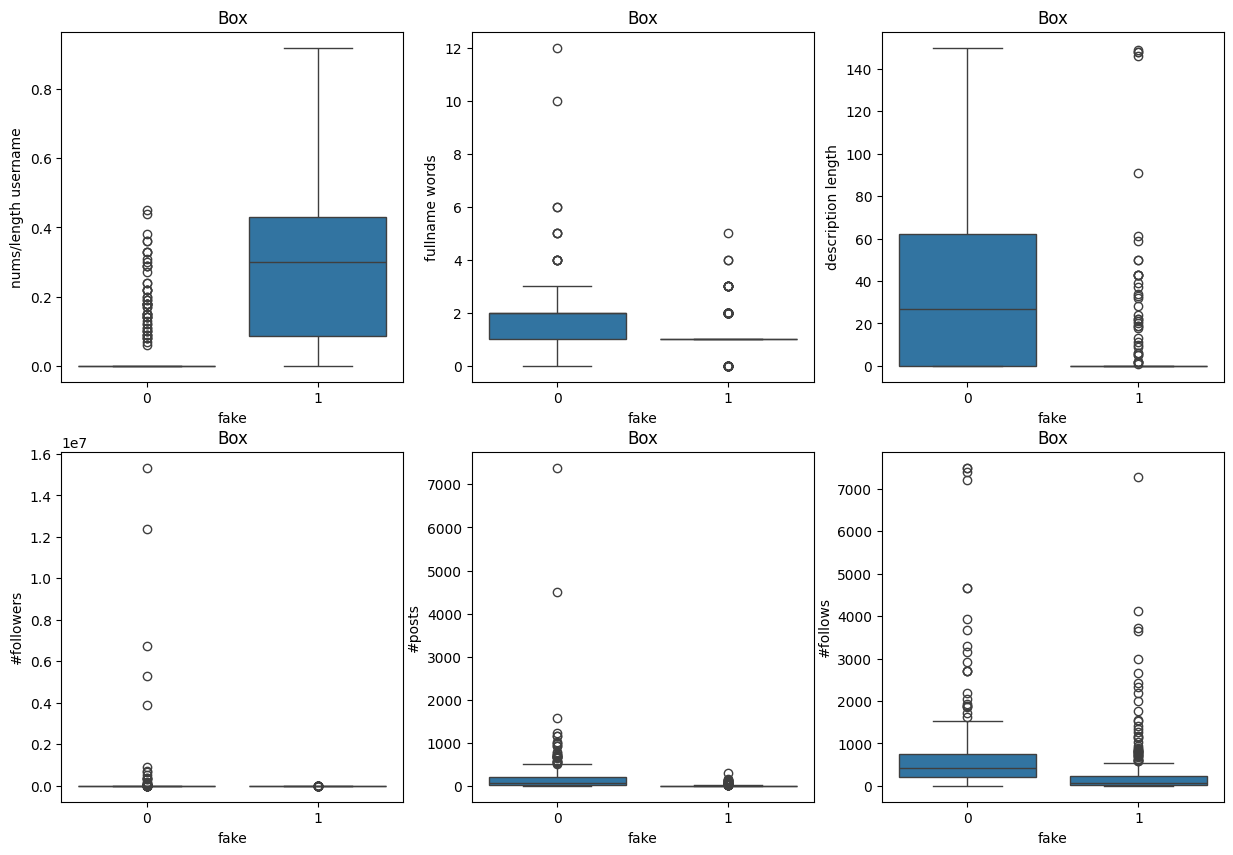

In [ ]:
num_features = ['nums/length username', 'fullname words', 'description length', '#followers', '#posts', '#follows']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='fake', y=col, data=train_data) # Assuming train_df should be train_data
    plt.title(f'Box')

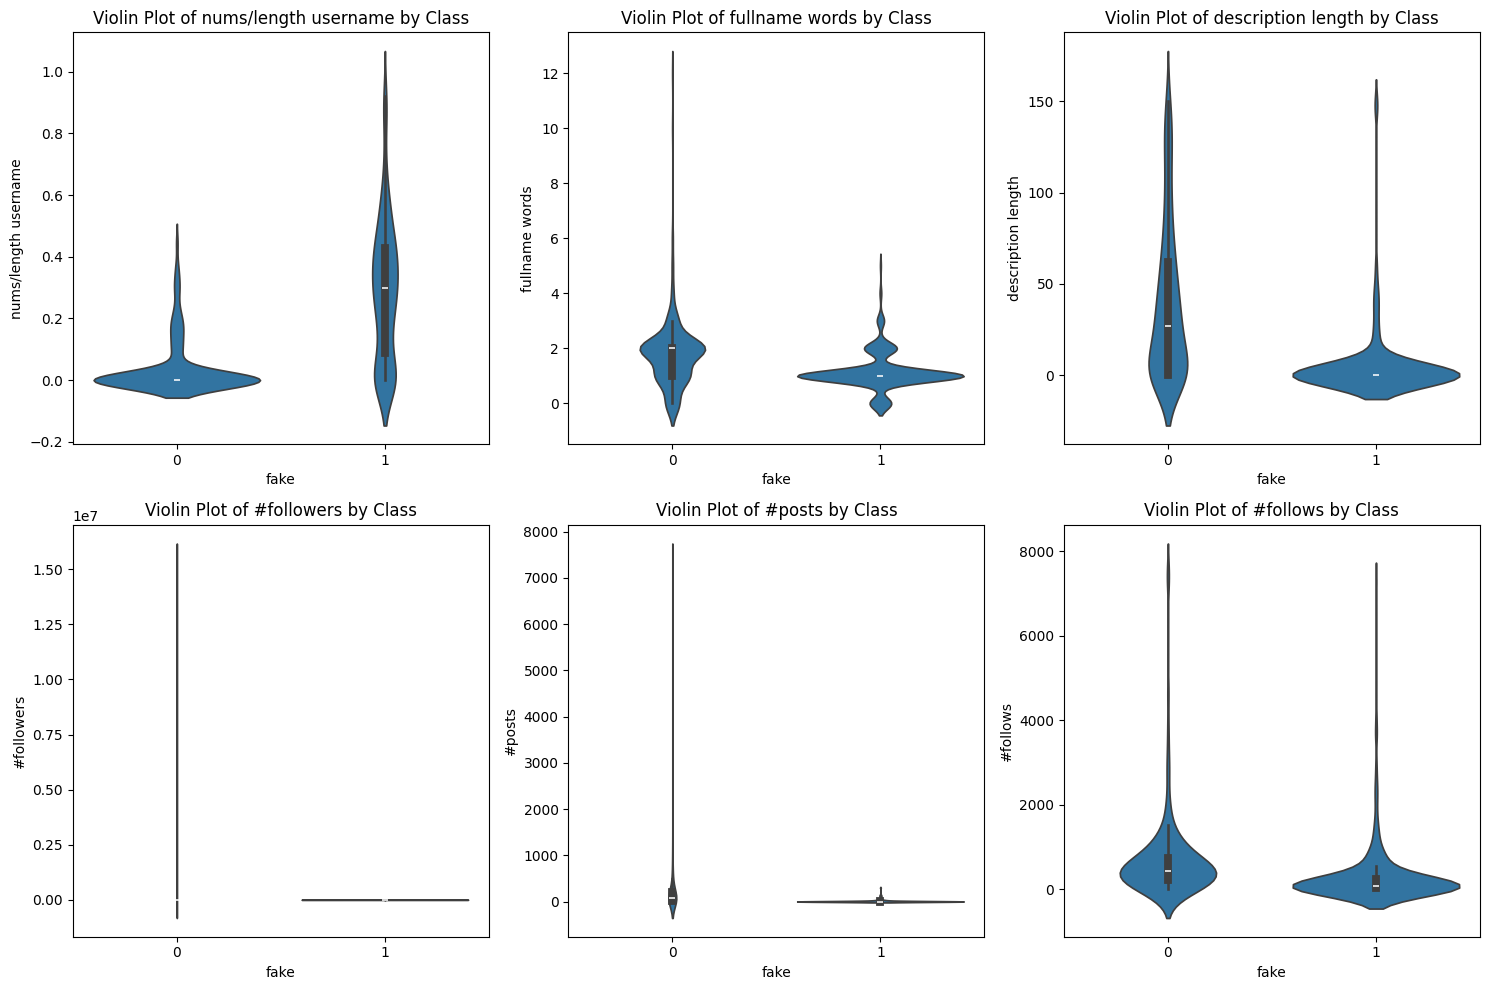

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='fake', y=col, data=train_data)
    plt.title(f'Violin Plot of {col} by Class')
plt.tight_layout()
plt.show()

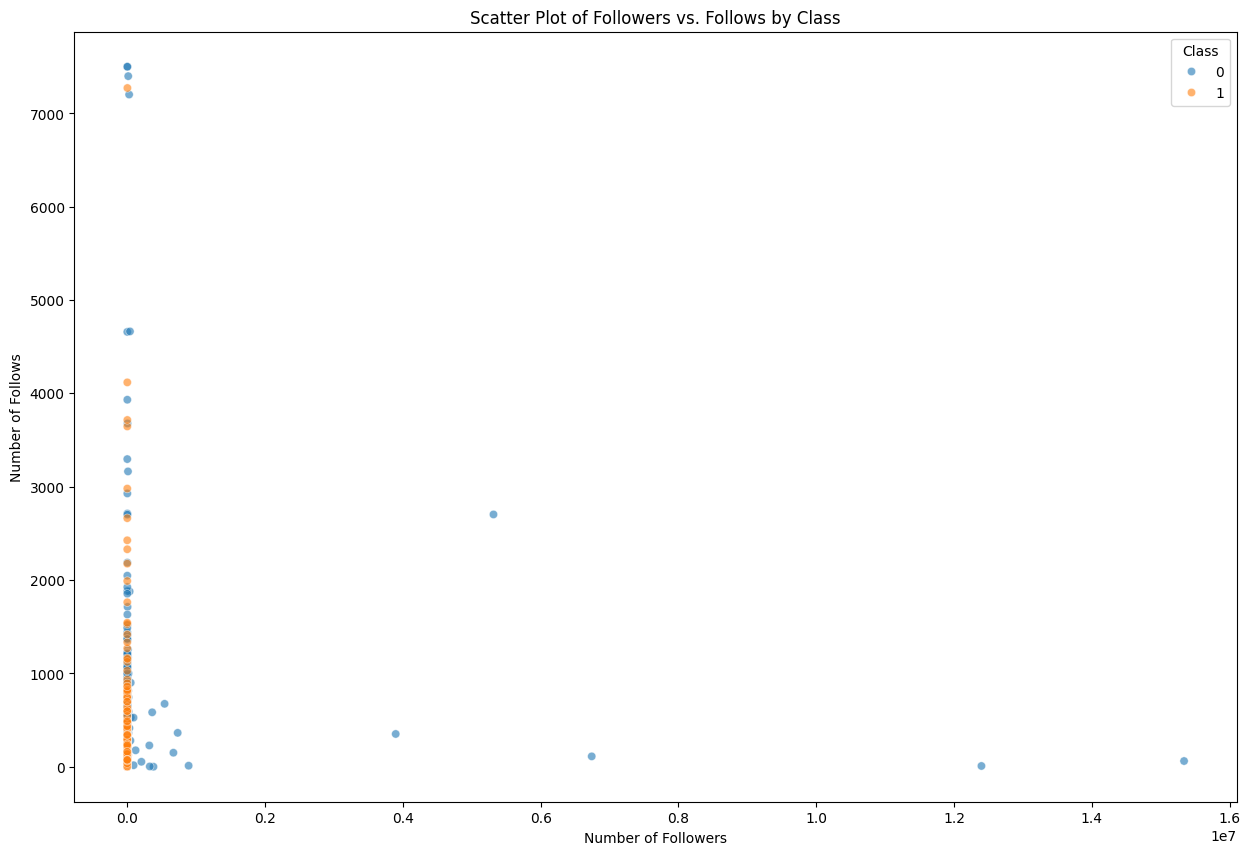

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=train_data, x='#followers', y='#follows', hue='fake', alpha=0.6)
plt.title('Scatter Plot of Followers vs. Follows by Class')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Follows')
plt.legend(title='Class', loc='upper right')
plt.show()

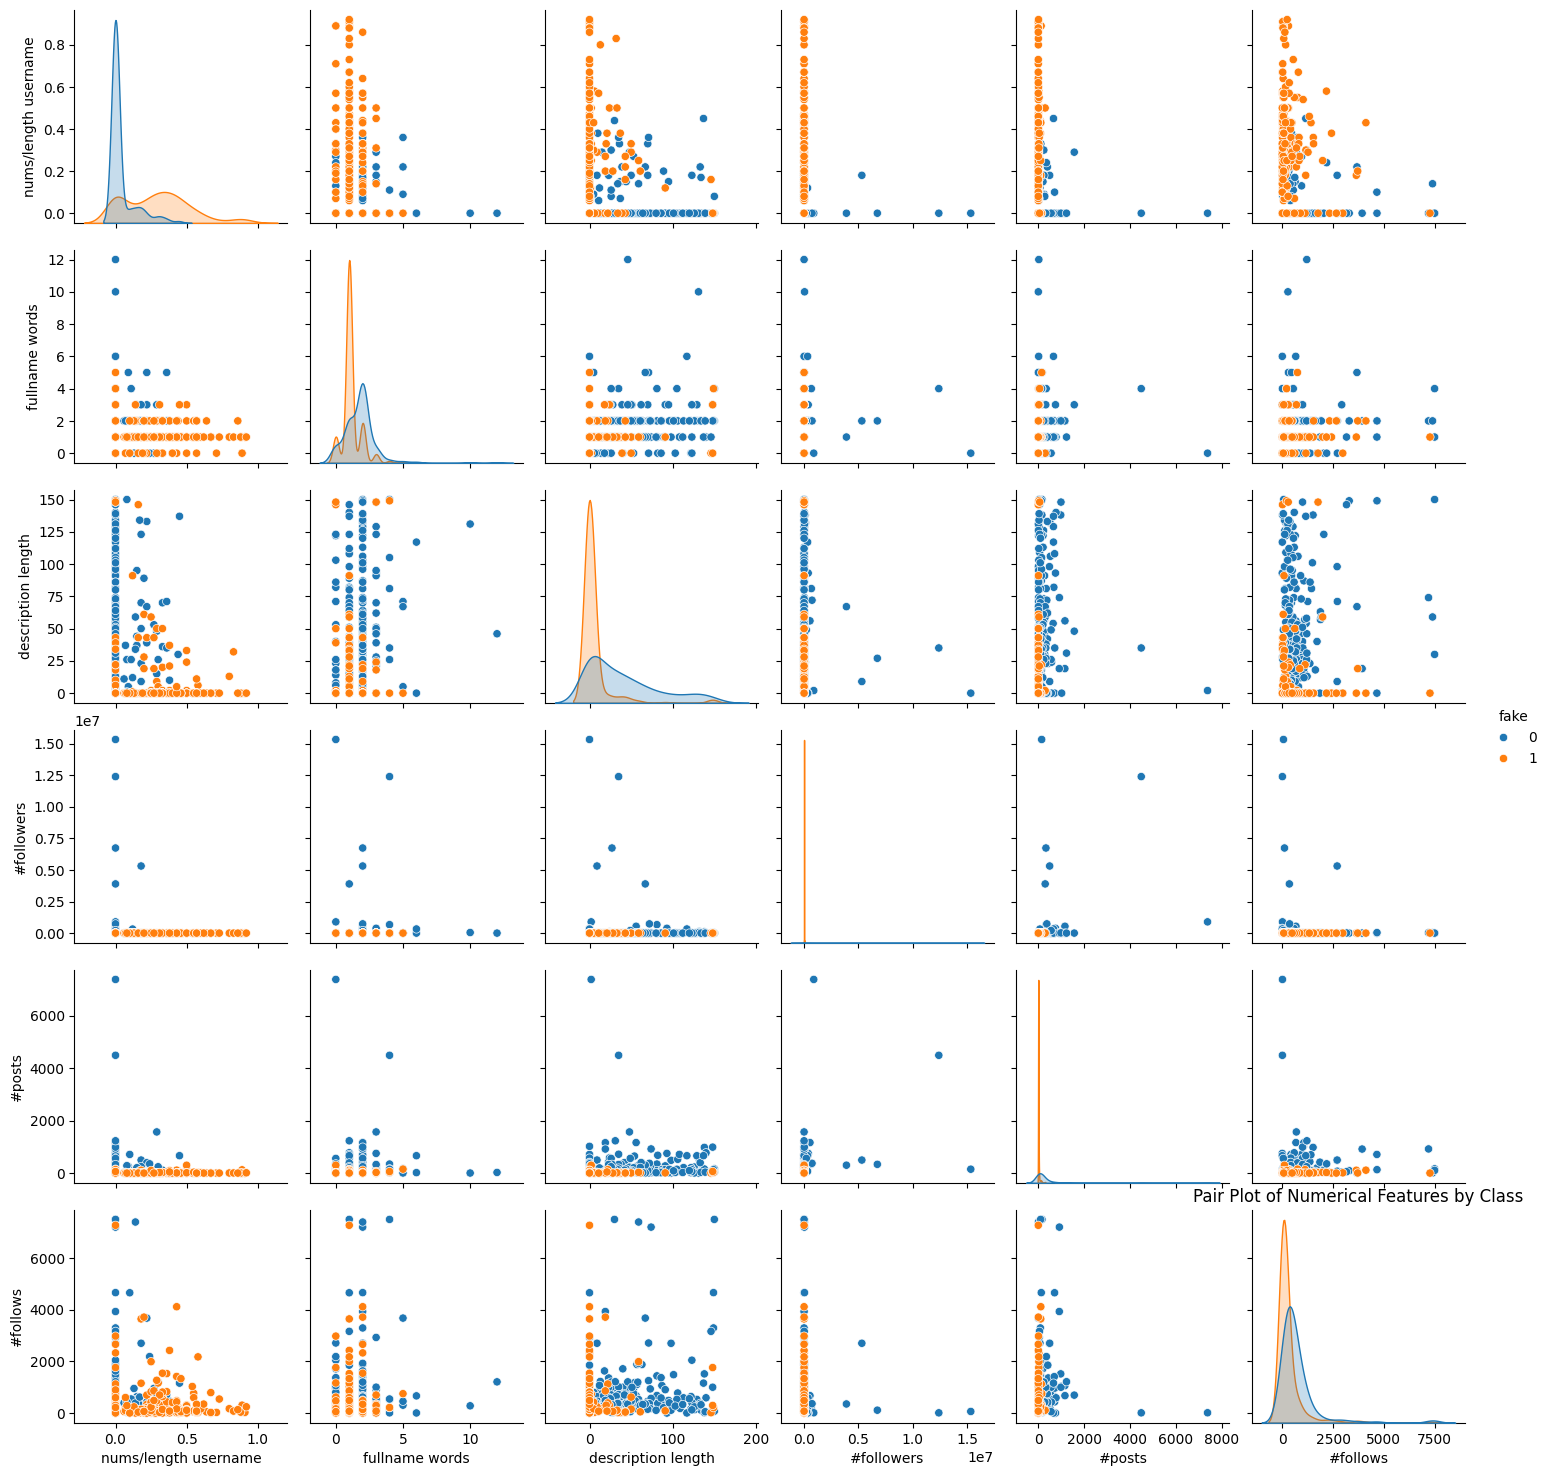

In [ ]:
# Pair plots to visualize relationships between features
sns.pairplot(train_data, hue='fake', vars=num_features)
plt.title('Pair Plot of Numerical Features by Class')
plt.show()

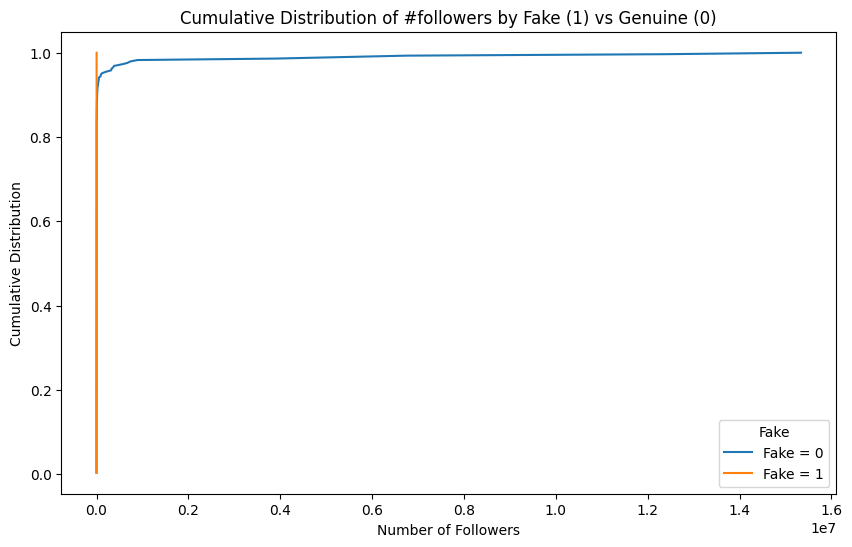

In [ ]:
plt.figure(figsize=(10, 6))
for label in sorted(train_data['fake'].unique()):
    subset = train_data[train_data['fake'] == label]
    sorted_vals = np.sort(subset['#followers'])
    cumulative = np.arange(1, len(sorted_vals) + 1) / len(sorted_vals)
    plt.plot(sorted_vals, cumulative, label=f"Fake = {label}")
plt.xlabel("Number of Followers")
plt.ylabel("Cumulative Distribution")
plt.title("Cumulative Distribution of #followers by Fake (1) vs Genuine (0)")
plt.legend(title="Fake")
plt.show()

# Model Building

Test Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.93      0.90      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120


Confusion Matrix:
 [[56  4]
 [ 6 54]]


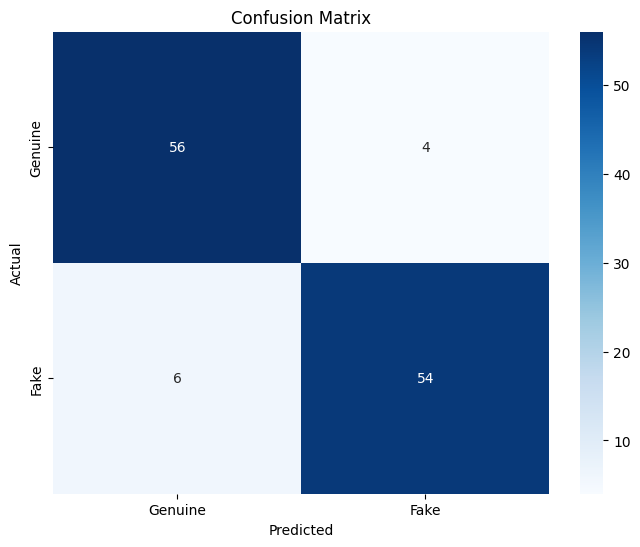

In [ ]:
# ========================
# 2. Model Building
# ========================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define features and target variable
features = ['profile pic', 'nums/length username', 'fullname words',
            'name==username', 'description length', 'external URL',
            'private', '#posts', '#followers', '#follows']
X_train = train_data[features]
y_train = train_data['fake']

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train,
                                                                test_size=0.2,
                                                                random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# ========================
# 3. Testing the Model on the Test Dataset
# ========================
# Prepare the test dataset
X_test = test_data[features]
y_test = test_data['fake']

# Make predictions on the test dataset
y_pred = rf_model.predict(X_test)

# ========================
# 4. Evaluating Model Performance
# ========================
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Generate classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Genuine', 'Fake'],
            yticklabels=['Genuine', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE  # For data augmentation
from xgboost import XGBClassifier  # For XGBoost

Train Class Distribution:
 fake
0    0.5
1    0.5
Name: proportion, dtype: float64
Test Class Distribution:
 fake
0    0.5
1    0.5
Name: proportion, dtype: float64


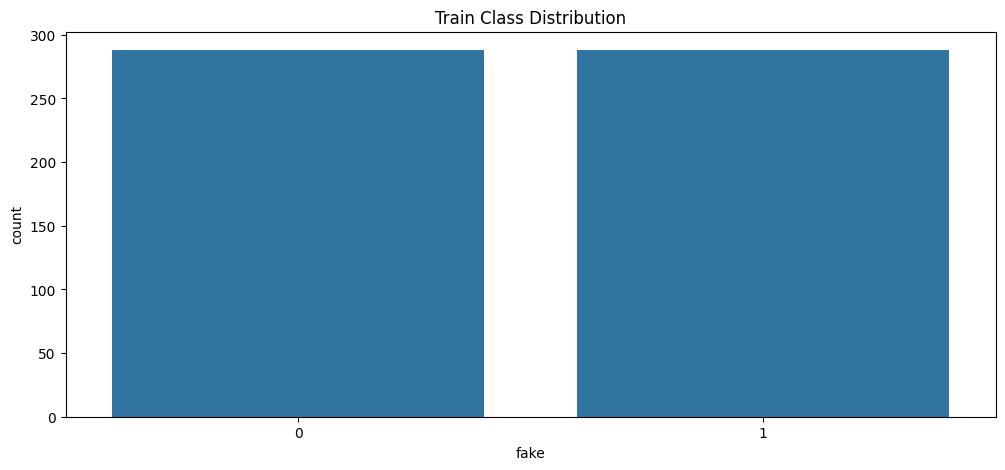

In [ ]:
# Class distribution
print("Train Class Distribution:\n", train_data['fake'].value_counts(normalize=True))
print("Test Class Distribution:\n", test_data['fake'].value_counts(normalize=True))

# Visualize class distribution
plt.figure(figsize=(12, 5))
sns.countplot(x='fake', data=train_data)
plt.title('Train Class Distribution')
plt.show()

In [ ]:
# Separate features and target variable
X = train_data.drop('fake', axis=1)
y = train_data['fake']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", y.value_counts())
print("Resampled dataset shape:", y_resampled.value_counts())

Original dataset shape: fake
0    288
1    288
Name: count, dtype: int64
Resampled dataset shape: fake
0    288
1    288
Name: count, dtype: int64


In [ ]:
# Create new features
train_data['follower_following_ratio'] = train_data['#followers'] / (train_data['#follows'] + 1)
test_data['follower_following_ratio'] = test_data['#followers'] / (test_data['#follows'] + 1)

# Log transformation for skewed features
train_data['log_followers'] = np.log1p(train_data['#followers'])
test_data['log_followers'] = np.log1p(test_data['#followers'])

# Drop original columns if necessary
features = ['profile pic', 'nums/length username', 'fullname words',
            'name==username', 'description length', 'external URL',
            'private', '#posts', 'log_followers', 'follower_following_ratio']

In [ ]:
# Define features and target variable
X_train = train_data[features]
y_train = train_data['fake']

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train,
                                                                test_size=0.2,
                                                                random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_split, y_train_split)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                               cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_split, y_train_split)

# Best parameters for Random Forest
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Prepare the test dataset
X_test = test_data[features]
y_test = test_data['fake']

# Make predictions on the test dataset using Random Forest
y_pred_rf = grid_search_rf.predict(X_test)

# Make predictions on the test dataset using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

Random Forest Test Accuracy: 0.94

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        60
           1       0.92      0.97      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120


Random Forest Confusion Matrix:
 [[55  5]
 [ 2 58]]


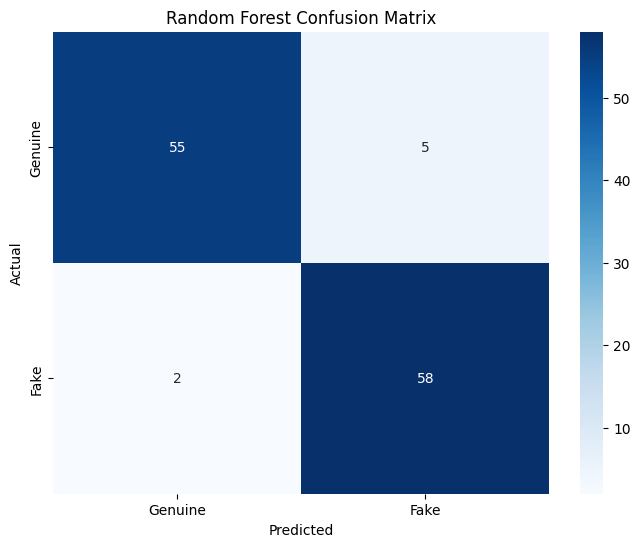

Gradient Boosting Test Accuracy: 0.95

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        60
           1       0.95      0.95      0.95        60

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120


Gradient Boosting Confusion Matrix:
 [[57  3]
 [ 3 57]]


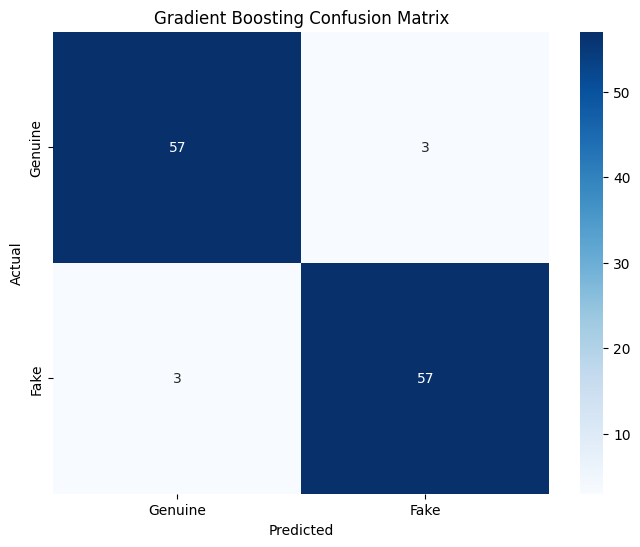

In [ ]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Test Accuracy: {accuracy:.2f}")

    # Generate classification report
    print(f"\n{model_name} Classification Report:\n", classification_report(y_true, y_pred))

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"\n{model_name} Confusion Matrix:\n", conf_matrix)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Genuine', 'Fake'],
                yticklabels=['Genuine', 'Fake'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Random Forest Model
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate Gradient Boosting Model
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

In [ ]:
# Assuming you have already defined features and target variable
X_train = train_data[features]
y_train = train_data['fake']

# Split the training data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train,
                                                                test_size=0.2,
                                                                random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

RandomForestClassifier(random_state=42)

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = features

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

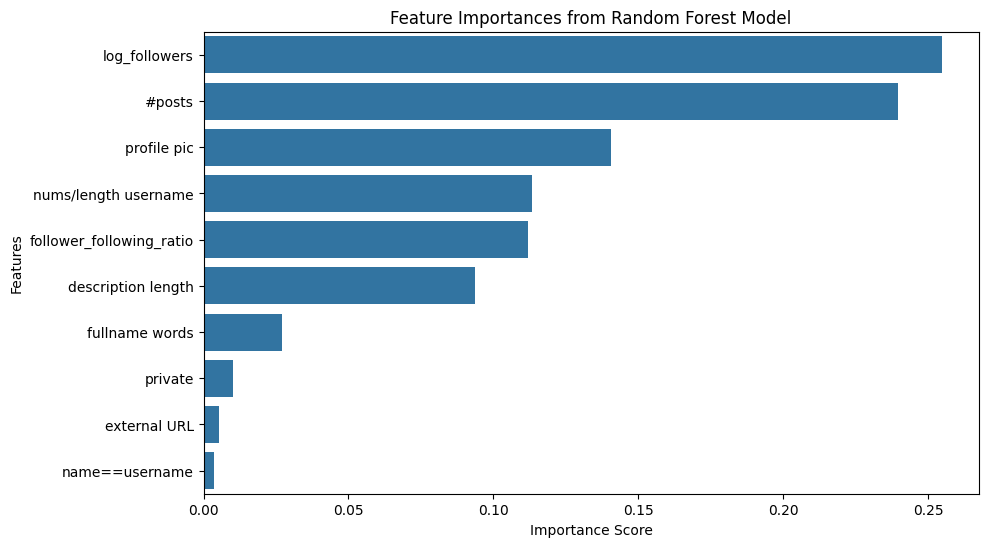

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
pip install shap

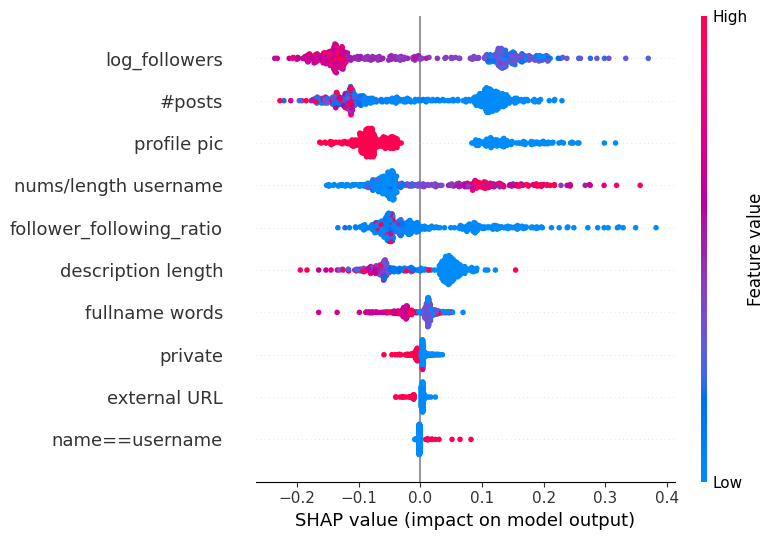

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_split)

# Summary plot for class 1
# shap_values[1] should be shap_values[:, :, 1] to get SHAP values for class 1
shap.summary_plot(shap_values[:, :, 1], X_train_split, feature_names=features)